# AllLife Credit Card Customer Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


import warnings 
warnings.filterwarnings('ignore')

# 1. Perform  univariate  analysis  on  the  data  to  better  understand  the  variables  at  your disposal  and  to  get  an  idea  about  the  no  of  clusters. Perform  EDA,  create visualizations to explore data

# 2. Properly  comment  on  the  codes, provide  explanations  of  the  steps  taken  in  the notebook and conclude your insights from the graphs

In [2]:
#loading data into dataframe variable
dataframe=pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
#checking if the data has been loaded correctly
dataframe.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
#shape of dataframe
dataframe.shape

(660, 7)

Data is organized in 660 rows and 7 columns.

In [5]:
#basic statistics of data
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


All columns have 660 non-null values, however, check must be run whether all values are of numerical type. Standard deviations of columns [Total_Credit_Cards : Total_calls_made] are lower then mean values of those columns and are of the same size of magnitude. Standard deviation of the Avg_Credit_Limit is somehow greater than mean value, however, it is still of the same size of magnitude for that particular column. Min values of columns related to type of contact with a bank are equal to zero. It is hard to make any conclusion about distribution of data within column at this point, however distribution plots might give much better insight in this context. max values of all columns indicate there might be some positive/right skewness.   

In [6]:
dataframe.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no indicated null values in any of the columns. Non numerical values will be checked later.

In [7]:

dataframe.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

All columns are consisted of 64 bit integer data types.

In [8]:
#checking if there is any row having non numerical value. 
#At the end, the .all() is applied to check final result of the output of rows 
dataframe.applymap(lambda x: isinstance(x,(int))).all(1).all()

True

There are no non numerical values in whole dataset

In [9]:
#finding the number of unique values in each variable
for i in dataframe.columns:
    print ('Number of unique values for varibale {} is {}'.format(i, len(dataframe[i].unique())))

Number of unique values for varibale Sl_No is 660
Number of unique values for varibale Customer Key is 655
Number of unique values for varibale Avg_Credit_Limit is 110
Number of unique values for varibale Total_Credit_Cards is 10
Number of unique values for varibale Total_visits_bank is 6
Number of unique values for varibale Total_visits_online is 16
Number of unique values for varibale Total_calls_made is 11


As indicated above, first two columns have large number of unique values (first one covering all rows, second 655 out of 660 values). Even though it is not explicitly written in data description, it may be cocluded that first two columns represent certain type of unique customer id. Second row indicate there might be duplicates of the customer key, so further analysis of it will be done.

In [10]:
#generating a list of duplicates from Customer key
duplicates=dataframe[dataframe['Customer Key'].duplicated()==True].iloc[:,1].tolist()

In [11]:
#printing all columns having Customer key equal to those indicated in duplicates
for i in duplicates:
    print(dataframe[dataframe['Customer Key']==i])

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
4        5         47437            100000                   6   
332    333         47437             17000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
4                    0                   12                 3  
332                  3                    1                 0  
     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
391    392         96929             13000                   4   
398    399         96929             67000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  
391                  5                    0                 0  
398                  2                    2                 2  
     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
48      49         37252              6000                   4   
432    433         37252             59000                   6   

     Total_visits_b

All other columns associated with duplicated Customer key indicate there might be no duplicates after all, since the above analysis shows difference in values of other attributes. 

Even thopugh it is not strictily required, multivariate analysis in form of correlation matrix/heatmap plot is done below to provide some insight in correlation betwen varaibles. Since earlier analysis showed that first two columns identifies particular customers, those are omitted in this analysis.

<AxesSubplot:>

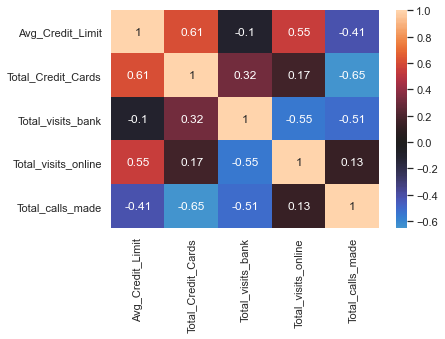

In [12]:
sns.heatmap(dataframe.iloc[:,2:].corr(), center=0, annot=True)

There is no strong correlation indicated among columns presented in a heatmap above, however there is slight positive correlation between number of credit cards and average credit limit. ther is some correlation between total visits online and avg credit limit, and negative between total visits online and total visits bank. Later is expected behaviour since one is excluding the need for the other.

### Outliers

1.5*IQR above 75th percentile method will be used to identify outliers

In [13]:
#Calculating interquartal range for dataset
IQR=dataframe.quantile(.75)-dataframe.quantile(.25)

Only upper boundaries will be used, since lower boundaries would be negative and, hence, no outliers is expected to be in that region (there ar eno negative values in dataset).

In [14]:
#generating subdataframe callled "outliers" by extracting only those rows of original dataframe in which at least one outlier could be found.
outliers=dataframe[(dataframe.iloc[:,2:]>(dataframe.quantile(.75)+1.5*IQR)).any(1)]

In [15]:
#shape of the outlier - to identify the size of outliers dataframe
outliers.shape

(49, 7)

In [16]:
#running through columns of outliers dataframe to identify how many of outliers are related to particular column
j=2
for i in dataframe.columns[2:]:
    print('Number of outliers in column {} is {}.'.format(i, outliers[outliers[i]>=(dataframe.quantile(.75)+1.5*IQR)[j]].shape[0]))
    j=j+1

Number of outliers in column Avg_Credit_Limit is 39.
Number of outliers in column Total_Credit_Cards is 0.
Number of outliers in column Total_visits_bank is 0.
Number of outliers in column Total_visits_online is 37.
Number of outliers in column Total_calls_made is 0.


Percentage of values indicated as outliers in column
- Avg_Credit_Limit is 5.91%
- Total_visits_online is 5.61%

Total number of rows with at least one outlier is 49 which constitue 7.42% of whole dataset

Outliers will not be treated at this point, since clustering may solve the problem of outliers. E.g. if datapoints considered as outliers when whole dataset is taken into account are "similar" - whith low distance between them, they might get grouped (clustered togehter), creating a separate cluster of customers. Therefore it is worth keeping outliers unchanged at this stage. Analysis of outliers will be done once clustering is made. 

### Visualisation

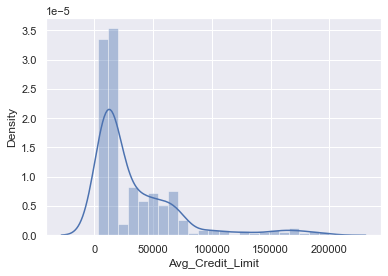

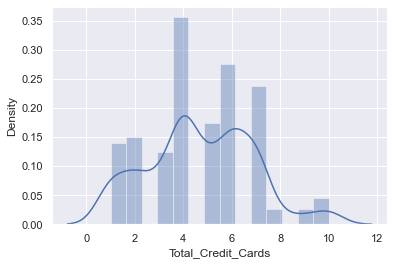

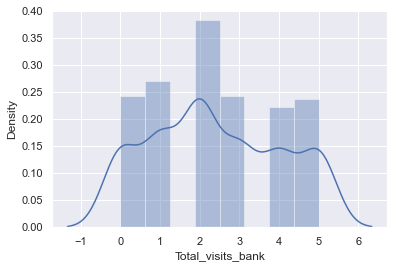

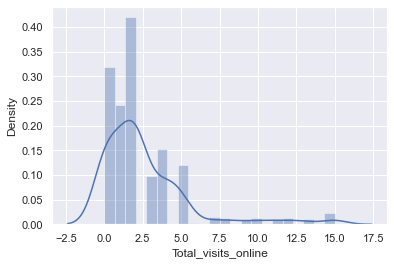

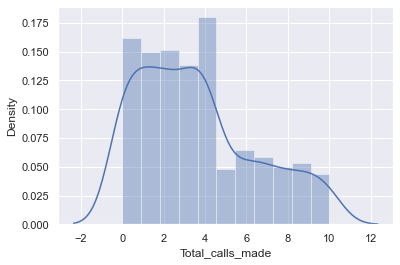

In [17]:
for i in dataframe.columns[2:]:
    sns.distplot(dataframe[i])
    plt.show()

Average_Credit_limit and Total_visits_online are right skewed. Total_calls_made is somehow right skewed, however it looks like there are two distributions - one having values less then 4 and the other more than 4. Total_visits_bank and Total_credit_card are somehow uniformly distributed. Total_visits_bank indicate there might be 3 groups of values, Total_calls_made indicate there might be 2 groups of values. Both, Total_credit_cards and Total_visits_bank indicate highest groups of values possible.

Let's see distribution of two variables which indicate highest possbile number of clusters - Total_credit_cards and Total_visits_bank more closely. The distribution is plotted as 3 dimensional KDE plot in a similar fashion as geographical charts - darker color of fill represent peak, ligher color valley. The aim is to verify number of peaks from both angles (from perspective of both variables) simultanously to identfy if there are some overlaps of peaks if seen only from one angle (one varibale).

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_visits_bank'>

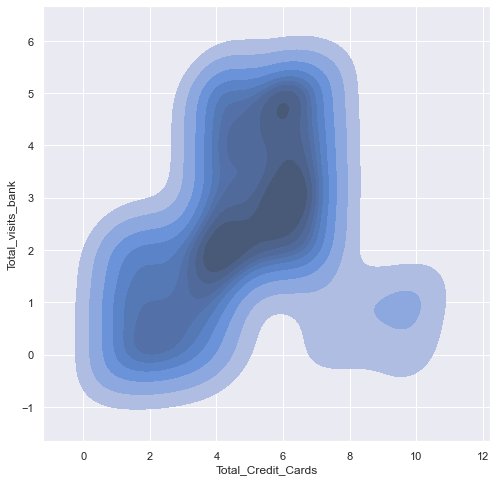

In [18]:
f, ax=plt.subplots(figsize=(8,8))
sns.kdeplot(data=dataframe,
           x='Total_Credit_Cards',
           y='Total_visits_bank', 
            fill=True)

Above plot shows 3 peaks which migh lead us to a conclusion there might be 3 distinct clusters.

## 3. Execute K-Mean clustering use elbow plot and analyise clusters using boxplot

In [19]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, silhouette_samples

To decide on the number of cluster two different methods will be used:
- elbow method based on plot of "in cluster sum of squares"
- silhouette analysis method as described in [1].

First mehtod runs through number of clusters equal from 1 to 10 and plots the curve of in cluster sum of squares, or better to say sum of distances of datapoints to its cluster centroid against number of clusters for dataset. Once the plot is drawn, selection of best number of clusters is done based on rate of reduction of sum of distances. 

The other method uses silhouette coefficients. average silhouette score is calculated for different number of clusters and within cluster silhouette coefficient is depicted for each datapoints beloging to particular cluster. Then the decission is made based on average silhouette score and by comparison of silhouette coefficients of each datapoints within a clusters to average score.  

[1] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

#### Mehtod 1 - elbow

Code is slightly modified version of code already used during the course

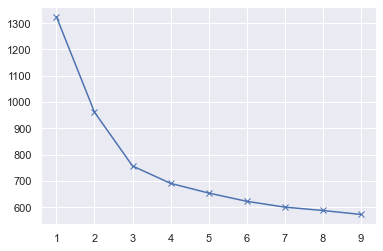

In [20]:
#setting the range for number of clusters
clusters=range(1,10)

#list of in cluster summ of squares initiation
inClusterSumOfSquares=[]

#for loop which runs through range of number of 
#clusters to summarize in cluster summ of squares for each try
for k in clusters:
    
    #creating an instance of KMeans object with specific number of clusters
    model=KMeans(n_clusters=k, random_state=7)
    
    #fitting the model with data - first 2 rows are not used
    #data is scalled by applying zscore
    model.fit(dataframe.iloc[:,2:].apply(zscore))
    
    #assigning each datapoint to its cluster; dataset had to be scalled as well
    prediction=model.predict(dataframe.iloc[:,2:].apply(zscore))
    
    #calculating in cluster summ of squares and appending it to list for later visualisation
    #distance between each datapoint and centroids from a model is calculated by application of euclidean distance method...
    #...and minimum distance is taken for summation (since the min distance is the one between centroid to which datapoint should be assigned)
    inClusterSumOfSquares.append(sum(np.min(cdist(dataframe.iloc[:,2:].apply(zscore), model.cluster_centers_, 'euclidean'), axis=1)))

#visualisation of the in cluster summ of squares against number of clusters
plt.plot(clusters, inClusterSumOfSquares, 'bx-')


Using the elbow method based on the above plot, it can be concluded that significant reduction in in-cluster sum of squares is achieved up to 3 clusters. As a result, KMeans will be run with 3 clusters. 

#### Method 2 - Silhouette analysis

Followig code is used to enable second method - based on silhouette analysis. the code is modified version of the one published on [1]

[1] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

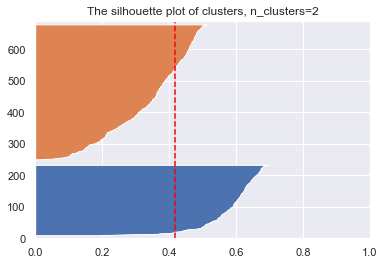

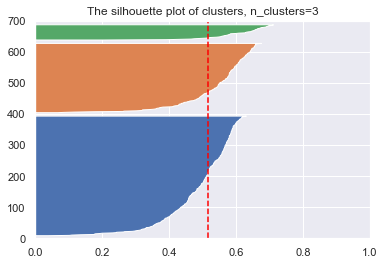

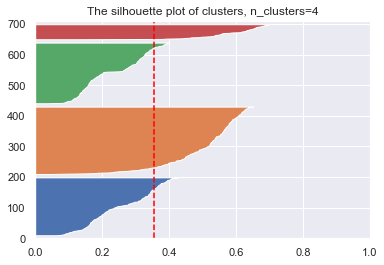

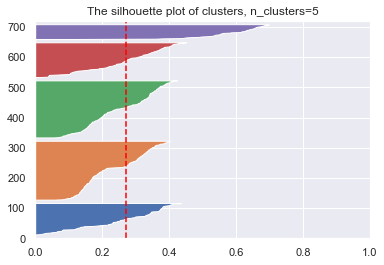

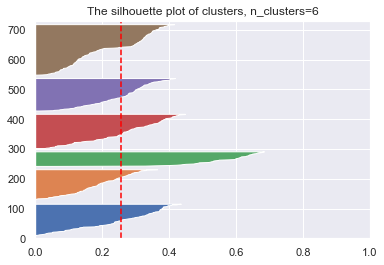

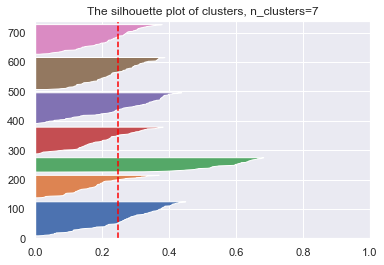

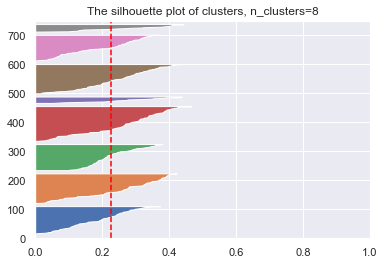

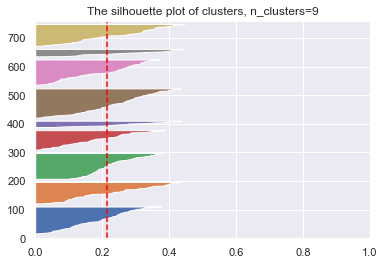

In [21]:
#possible number of clusters starts from 2,... 
#...since silhouette coefficient can not be calculated for n_clusters=1
nr_of_clusters=range(2,10)

#loop through all possible number of clusters from range above
for k in nr_of_clusters:
    
    fig, axs=plt.subplots()
    #setting the limits of the plot
    #limits of the plot ranges for x axis [0,1]
    axs.set_xlim([0,1])
    #range for y axis ranges from 0 to number of datapoints plus... 
    #...margin which is calculated as number of clusters times 10...
    #...10 is set as spacing to separate different cluster's silhouette coefficient score of each datapoint 
    #the reason to do so is to avoid overlaping of plots for different clusters
    axs.set_ylim([0,len(dataframe)+(k+1)*10])
    
    #creating an instance of KMeans object with specific number of clusters
    model=KMeans(n_clusters=k, random_state=7)
    #running a prediction in a same step as fit
    prediction=model.fit_predict(dataframe.iloc[:,2:].apply(zscore))
    
    #calculating overal silhouette score
    silhouette_avg=silhouette_score(dataframe.iloc[:,2:].apply(zscore), prediction)
    
    #calculating silhouette score of each datapoint
    #inputs are dataset and corresponding prediction - list of assigned clusters
    datapoint_silh_values=silhouette_samples(dataframe.iloc[:,2:].apply(zscore), prediction)
    
    #loop to plot datapoint_silh_values
    #loop runs through all clusters for particular n_cluster
    #setting lower value of y
    y_lower=10
    for l in range(k):
        #taking all datapoint_silh_values for particular cluster "l"
        ith_cluster_silh_values=datapoint_silh_values[prediction==l]
        #sorting values within array to make nicer plot
        ith_cluster_silh_values.sort()
        
        #calculating the size of cluster to define upper boundary which will be used as lower boiundary for next cluster
        size_cluster_i=ith_cluster_silh_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        #fill the area between two vertical curves
        axs.fill_betweenx(np.arange(y_lower, y_upper), 
                          0, ith_cluster_silh_values)
        
        #defining new lower boundary
        y_lower=y_upper+10
    
    #plotting red vertical line which marks vaerage silhouette coefficient of model with n_clusters 
    axs.axvline(x=silhouette_avg, color='red', linestyle='--')
    
    #setting a title of plot
    axs.set_title("The silhouette plot of clusters, n_clusters={}".format(k))
    

By far the best average silhouette coefficient is achieved when the number of clusters is equal to 3. In other words, it mean that those clusters are consisted of best separated datapoints. In addition, the distribution of ith_cluster_silh_values is quite similar, however it is worth noting cluster zero is the biggest one, far bigger compared to cluster 2. When the number of clusters is equal to 5, 6 or 7 we have one cluster that is clustered far better then the rest, however, average silhouette score is very low, and other datapoints are poorly clusterd.

#### Final conclusion
Based on two methods presented above, the best number of clusters is equal to 3, and the rest of KMeans clustering will be done with such number of clusters.

In [22]:
kMean_3_clust=KMeans(n_clusters=3, random_state=7)

In [23]:
kMean_3_clust.fit(dataframe.iloc[:,2:].apply(zscore))

KMeans(n_clusters=3, random_state=7)

Since the process of initial selection of cluster's centroids is random, following code examine consistency in convergence of centroids to certain "location". The idea is to fit the model 10 times and to plot values of attributes for each centroid of each cluster.

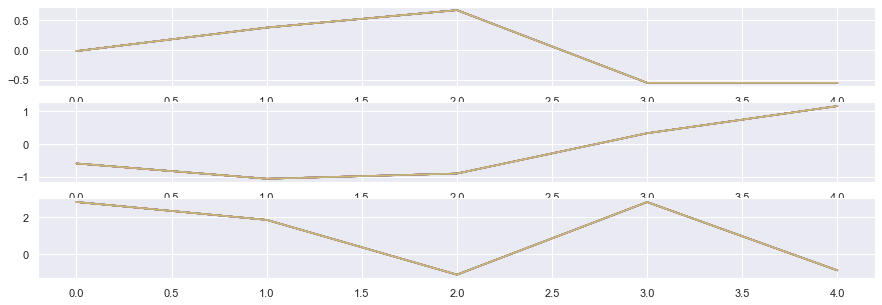

In [24]:
fig, (ax1, ax2, ax3)=plt.subplots(nrows=3, figsize=(15,5))

for i in range(1,10):
    #fitting the model
    kMean_3_clust.fit(dataframe.iloc[:,2:].apply(zscore))
    
    #plotting values of attributes/variables of each centroids
    #for cluster 0
    ax1.plot(np.arange(0,5), kMean_3_clust.cluster_centers_[0])
    #for cluster 1
    ax2.plot(np.arange(0,5), kMean_3_clust.cluster_centers_[1])
    #for cluster 2
    ax3.plot(np.arange(0,5), kMean_3_clust.cluster_centers_[2])
    
    #plt.plot()

All points in plots above are alligned throughout all tries of fits which indicates the centroids of clusters, even though start randomly, converge to same points in 5 dimensional space.

In [25]:
#creating a copy od ataframe
kMeans_data_3_clusters=dataframe.copy()

In [26]:
#assigning datapoints to clusters
kMeans_data_3_clusters['cluster']=kMean_3_clust.predict(dataframe.iloc[:,2:].apply(zscore))

In [27]:
#number of datapoints in each cluster
kMeans_data_3_clusters['cluster'].value_counts()

0    386
1    224
2     50
Name: cluster, dtype: int64

Distribution of datapoints among clusters are as derived above. It can be seen that the most points reside in cluster 0 - 386, then in cluster 1 and the smallest cluster is cluster 2. 

In [28]:
#calculating mean values of attributes of each cluster
kMeans_data_3_clusters.groupby(['cluster']).mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


It can be seen in table above that clusters have fairly different mean values of total visits online, rendering cluster 2 to be, by far, a pool of customers using online services. Cluster 2 is also consisted of customers which have highest number of credit cards on average and credit limit as well. Cluster 0 clustered customers with highest average total visits to bank, and cluster 1 those with highest total calls made. 

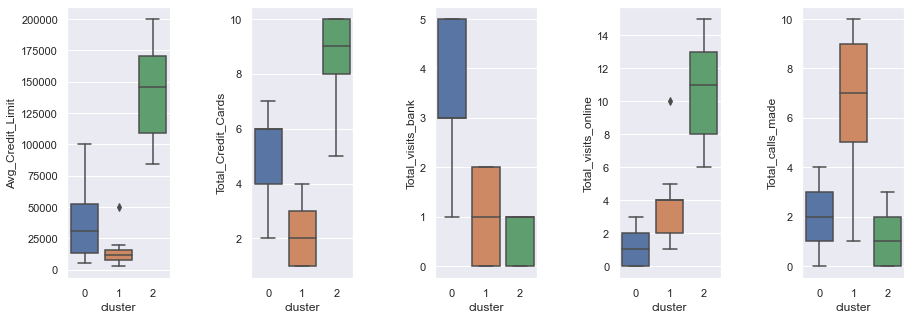

In [29]:
fig, axs=plt.subplots(ncols=5, figsize=(15,5))
j=0
for i in dataframe.columns[2:]:
    sns.boxplot(x=kMeans_data_3_clusters['cluster'], y=kMeans_data_3_clusters[i], ax=axs[j])
    j=j+1
plt.subplots_adjust(wspace=0.8)
plt.show()

There are two outliers indicated in boxplots above, both for cluster 1, for two vairables. Code below explore how many of datapoints are actually there. 

In [30]:
#extracting datapoints of cluster 1 where Avg_Credit_Limit is more than 30000
kMeans_data_3_clusters[kMeans_data_3_clusters['cluster']==1][kMeans_data_3_clusters['Avg_Credit_Limit']>30000]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
1,2,38414,50000,3,0,10,9,1


In [31]:
#extracting datapoints of cluster 1 where Total_visits_online is more than 6
kMeans_data_3_clusters[kMeans_data_3_clusters['cluster']==1][kMeans_data_3_clusters['Total_visits_online']>6]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
1,2,38414,50000,3,0,10,9,1


Indeed, there are only two outliers. Comparing to original dataset where around 7.5% of datapoints were considered as outliers, it is a significant reduction. 

#### General analysis
All three clusters shows different distribution of data of certain variables which make them distinguishable from each other. E.g. all three clusters have completly different distribution of Avg_Credit_Limits with almost no overlap of majority of data (IQR). The same applies for Total_credit_cards. Based on these two plots, one may conclude that cluster 1 conains customers which have lowest average credit limit and lowest number of credit cards. Completly the opposite is cluster number 2, and consequently cluster numebr 0 sits in between. From the type of contact with a bank perspective, each cluster have exactly one particular type of contact that is specific for that cluster - for example for cluster number 0 that is visit to the bank, for cluster number 1 is calls made and for cluster number 2 is visits online.

#### Outliers analysis
It is worth noting that once original dataset was clustered only two datapoints have been rendered as outliers in boxplots. The reason for that is that those datapoints considered as outliers in original dataset have been grouped togehter. Each of clusters have their own mean, IQR, std etc. As a result those values that have been falling into outliers domain, now, in when grouped with other similar datapoints no longer have a property of outlier.

#### Conclusion
As a conclusion, it could be said that those 3 clusters do fairly good job in clustering dataset of cutomers.

# 4. Execute hierarchical clustering(with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

To make code more readable and to avoid unneccessary computation, scaled dataset of relevant colums is saved in separate variable

In [33]:
#scaling dataset
datasetScaled=dataframe.iloc[:,2:].apply(zscore)

First we need to identify which type of distance method should be used based on the cophenetic correlation and dnednrogram. The higher the cophenetic correlation (closer to 1), better the choice is. 

In [34]:
#importing necessary libraries from scipy to calculate distances
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

To simplify code, a function is created which takes dataset and type of distance to use. It returns cophenetic correlation and agglomerative cluster encoded as linakge matrix.

In [35]:
#defining a function which returns value of cophenetic correlation
#function takes dataset and method
def getCophenetic(dataset, method):
    
    #agglomerative clustering - encoded as a linkage matrix
    #whichever method used, euclidean distance will be calculated
    Z=linkage(dataset, metric='euclidean', method=method)
    
    #calculating cophenetic correlation and cophenetic distance matrix
    c, coph_dists = cophenet(Z , pdist(dataset))#pdist is pairwise distance
    return (c, Z)

In [36]:
#a list of possible options of distance methods
method_list=['ward', 'complete', 'average', 'single']

A list of possible methods (linkages) is stored in varibale method_list. Looping through that list, different clustering will be obtained, and dendrograms plotted. Plots of dendrograms are truncated to simplify their appearances. Truncation has been done by using truncate_mode parameter. 

*************************************************************************
Cophenetic correlation for ward method is 0.7415156284827493


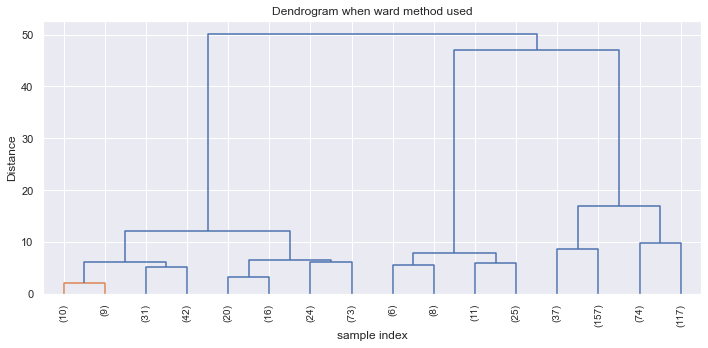

-------------------------------------------------------------------------
*************************************************************************
Cophenetic correlation for complete method is 0.8599730607972423


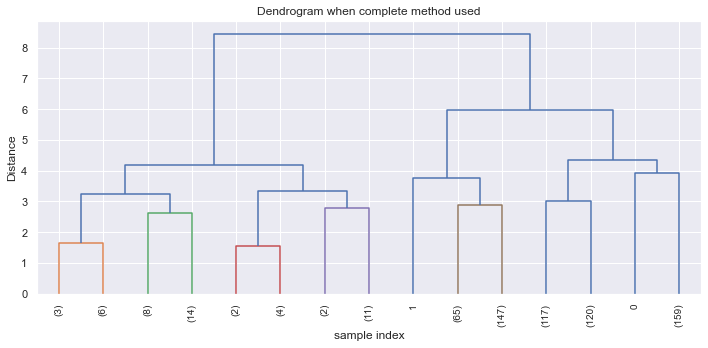

-------------------------------------------------------------------------
*************************************************************************
Cophenetic correlation for average method is 0.8977080867389372


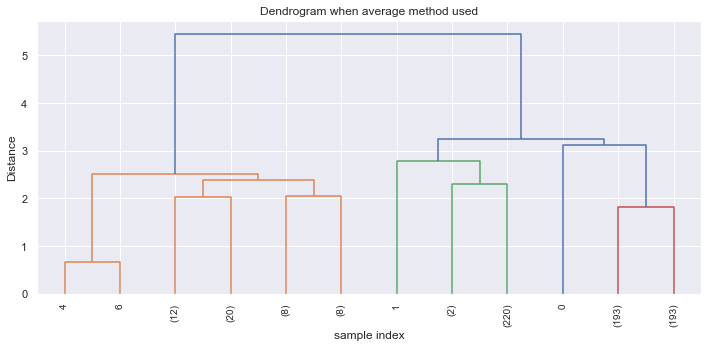

-------------------------------------------------------------------------
*************************************************************************
Cophenetic correlation for single method is 0.7391220243806552


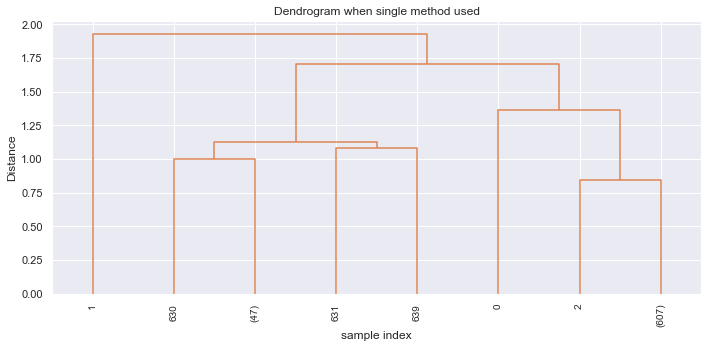

-------------------------------------------------------------------------


In [37]:
#loop thropugh list of distance methods to be used. 
for i in method_list:
    c,Z=getCophenetic(datasetScaled, i)
    print('*************************************************************************')
    print('Cophenetic correlation for {} method is {}'.format(i, c))
    
    #plotting dendrograms for each method
    plt.figure(figsize=(10, 5))
    plt.title('Dendrogram when {} method used'.format(i))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    #color_trehsold is set to 3 
    dendrogram(Z, p=3, leaf_rotation=90.,color_threshold = 3, truncate_mode='level', leaf_font_size=10 )
    plt.tight_layout()
    plt.show()
    print('-------------------------------------------------------------------------')

First method (ward) to calculate euclidean distance between clusters generated linkage matrix with highes distances. The one which provided the lowest distances is method which takes into consideration single linkage between clusters, however, it has lowest cophenetic correlation of 0.7391. 

The best cophenetic correlation is achieved when average linkage is used as method to calculate euclidean distance between clusters. 

It is worth noting that regardles of the method used to calculate distance between clusters, euclidean distance is used in each one of these methods.

As a result of this step, linkage=average will be used for further analysis. There are 4 singleton clusters indicated when dendrogram has been truncated for this particular linakge method. Since there is small distance between certain clusters if we try 3 or 4 clusters, both will be tested in next steps.

#### Agglomerative clustering, n_cluster=4, linakge='average'

In [38]:
#importing necessary libraries
from sklearn.cluster import AgglomerativeClustering

In [39]:
#instancing AgglomerativeClustering object
hier_model_average_4=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

In [40]:
hier_av_4_clusters=dataframe.copy()
hier_av_4_clusters['cluster']=hier_model_average_4.fit_predict(datasetScaled)

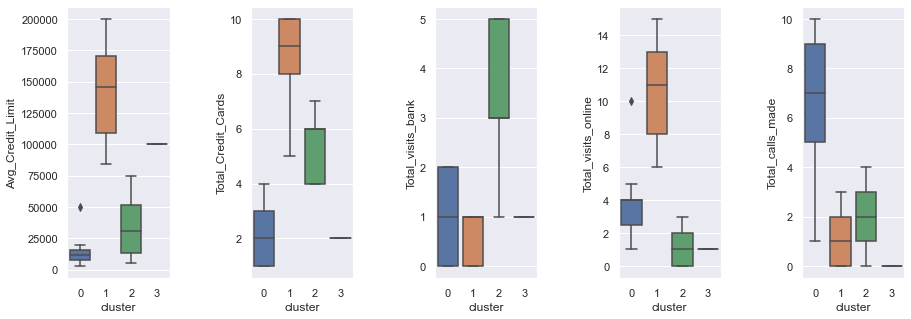

In [41]:
fig, axs=plt.subplots(ncols=5, figsize=(15,5))
j=0
for i in dataframe.columns[2:]:
    sns.boxplot(x=hier_av_4_clusters['cluster'], y=hier_av_4_clusters[i], ax=axs[j])
    j=j+1
plt.subplots_adjust(wspace=0.8)
plt.show()

In [42]:
hier_av_4_clusters[hier_av_4_clusters['cluster']==3]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,3


Datapoint of cluster 3 is unique because other datapoints with high avgerage credit limits have large number of total visits online, however, this particular datapoint has low contacts with bank in general.

#### Agglomerative clustering, n_cluster=3, linakge='average'

In [43]:
hier_model_average_3=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hier_av_3_clusters=dataframe.copy()
hier_av_3_clusters['cluster']=hier_model_average_3.fit_predict(datasetScaled)

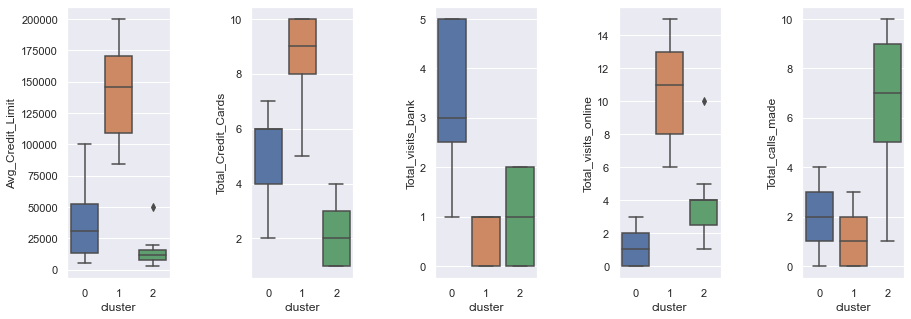

In [44]:
fig, axs=plt.subplots(ncols=5, figsize=(15,5))
j=0
for i in dataframe.columns[2:]:
    sns.boxplot(x=hier_av_3_clusters['cluster'], y=hier_av_3_clusters[i], ax=axs[j])
    j=j+1
plt.subplots_adjust(wspace=0.8)
plt.show()

In [45]:
hier_av_3_clusters[hier_av_3_clusters['Customer Key']==87073]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,0


Datapoints which formed singleton cluster in first attempt (cluster number 3), in second attempt had fallen into cluster 0.

#### Conclusion 
In both cases (n_clusters=4 and n_clusters=5) boxplots show distinction in data distribution across variables - e.g. all clusters are quite different when variables Avg_Credit_Limit and Total_Credit_Cards are taken into account. Like in  KMeans clustering, from the type of contact with a bank perspective, each cluster have exactly one particular type of contact that is specific for that cluster - for example for cluster number 0 that is visit to the bank, for cluster number 1 is calls made and for cluster number 2 is visits online.

#### Outliers
Same conclusion with regards to outliers as under the KMeans clustering was made, can be made here as well. In particular - only 2 outliers are identifed in clusters once the data is clustered - both for cluster number 2. 

In [46]:
#checking the size of clusters
hier_av_3_clusters.groupby(['cluster']).count()['Sl_No']

cluster
0    387
1     50
2    223
Name: Sl_No, dtype: int64

Number of datapoints in each cluster is identified above.

# 5. Calculate average silhouette score for both methods

In [47]:
kMean_3_clust_pred=kMean_3_clust.predict(datasetScaled)
hier_av_3_clust_pred=hier_model_average_3.fit_predict(datasetScaled)
hier_av_4_clust_pred=hier_model_average_4.fit_predict(datasetScaled)

In [48]:
silh_score_kMean_3_clust=silhouette_score(datasetScaled, kMean_3_clust_pred)
silh_score_hier_3_clust=silhouette_score(datasetScaled, hier_av_3_clust_pred)
silh_score_hier_4_clust=silhouette_score(datasetScaled, hier_av_4_clust_pred)

print("Silhouette score of clusters created using KMeans clustering with 3 clusters is {}.".format(silh_score_kMean_3_clust))
print("")
print("Silhouette score of clusters created using Hierarchical clustering with 3 clusters is {}.".format(silh_score_hier_3_clust))
print("")
print("Silhouette score of clusters created using Hierarchical clustering with 4 clusters is {}.".format(silh_score_hier_4_clust))

Silhouette score of clusters created using KMeans clustering with 3 clusters is 0.5157182558881063.

Silhouette score of clusters created using Hierarchical clustering with 3 clusters is 0.515922432650965.

Silhouette score of clusters created using Hierarchical clustering with 4 clusters is 0.47495143595793504.


As seen above, the best average silhouette coefficient is achieved when hierarchical clustering is used and data is divided into 3 clusters. The vworst one is for same type of clustering when data is clustered into 4 clusters. It is interesting to see how one datapoint (the one rendered as cluster 3 when 4 clusters have been derived from hierarchy) can have an impact on silhouette score. 


# 6. Compare K-means clusters with Hierarchical clusters.

Both methods - KMeans clustering and Hierarchical clustering created very similar clusters. In fact the only difference, when 3 clusters are considered in hierarchy of agglomerative hierarchical clustering, is one datapoint - the very same which formed singletone cluster when 4 clusters were considered in hierarchy. 

KMeans clustered datapoints in following ratio: cluster 0 - 386 datapoints, cluster 1 - 224 datapoints, cluster 2 - 50 datapoints. 
Hierarchical clustering clustered datapoints in following ration: cluster 0 - 387 datapoints, cluster 1 - 223 datapoints, cluster 2 - 50 datapoints.
As seen, in both cases there is one strong cluster of 50 datapoints which is concictent throughout methodology used and there is one datapoint which is somewhere in the middle of two clusters. 

As a conclusion, distribution of datapoints, as seen in boxplots, are very similar in both scenarios. There is one particulary distinct cluster which contains 50 datapoints.

# 7. Analysis  the  clusters  formed,  tell  us  how  is  one  cluster  different  from  another and answer all the key questions.

Both methods produced very similar clusters. Segmentation is based on two different aspects - one related to credit cards (number and average limit) and the other to type of contact (online, visits or calls). 
Members of cluster which data distribution is highest with respect to credit card limits and number of credit cards are specific when on line cocntact is in stake. Those type of customer, obviously, prefer on line contact. Those customer with lowest credit card limits have lowest number of cards and prefer contacting a bank via phone, while in the middle (with respect to credit card limit and number of cards) sits customers who prefer visits bank.

## 7.1 How many different segments of customers are there?

There are 3 different segments of customers based on 5 varibales - two related to credit cards (number of credit cards and average credit card limit) and 3 related to type of contact with a bank. 

## 7.2 How are these segments different from each other?

The very obvious difference is based on average credit card limit and number of credit cards. Segment with higher values of credit card limit has also higher value of number of credit cards. This segmentation has no overlap in distribution of values across those two variables.

Other three variables shows some overlap in distribution across segments, however, each segment has one contact variable distribution  which is very specific for that particular segment with no overlap with other segments - e.g. one cluster has significantly higher number of contacts online while other two overlap in that area etc.

## 7.3 What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?

Customer who have highest creit card limits and highest number of credit cards prefer online banking. FOr such customers type of communication should be based mainly on on line channels. Those type of customers are also, probable those, who makes highest revenue to the bank.

Customers who makes lowest revenue to the bank - those whit lowest credit card limit and small number of credit cards should be contacted via phone, so all communication should be focused through that channel.

All the other customers tends to visit bank, so all marketing effort should be focused on communcation in person with such customers.